# 实例14.2-卷积神经网络-实现cifar10图片识别

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']

cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train,x_test=tf.cast(x_train/255.0,tf.float32),tf.cast(x_test/255.0,tf.float32)
y_train,y_test=tf.cast(y_train,tf.int32),tf.cast(y_test,tf.int32)

In [6]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                      

In [7]:
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

model.fit(x_train,y_train,batch_size=32,shuffle="True",epochs=10,validation_split=0.2)

model.evaluate(x_test,y_test,verbose=2)

Epoch 1/10
1250/1250 [==============================] - 254s 203ms/step - loss: 1.5932 - sparse_categorical_accuracy: 0.4144 - val_loss: 1.2645 - val_sparse_categorical_accuracy: 0.5437
Epoch 2/10
1250/1250 [==============================] - 249s 199ms/step - loss: 1.2214 - sparse_categorical_accuracy: 0.5627 - val_loss: 1.0691 - val_sparse_categorical_accuracy: 0.6257
Epoch 3/10
1250/1250 [==============================] - 254s 203ms/step - loss: 1.0839 - sparse_categorical_accuracy: 0.6113 - val_loss: 0.9988 - val_sparse_categorical_accuracy: 0.6492
Epoch 4/10
1250/1250 [==============================] - 253s 202ms/step - loss: 0.9950 - sparse_categorical_accuracy: 0.6462 - val_loss: 0.9043 - val_sparse_categorical_accuracy: 0.6795
Epoch 5/10
1250/1250 [==============================] - 1766s 1s/step - loss: 0.9350 - sparse_categorical_accuracy: 0.6686 - val_loss: 0.8706 - val_sparse_categorical_accuracy: 0.6908
Epoch 6/10
1250/1250 [==============================] - 253s 202ms/step 

[0.7871994376182556, 0.7246999740600586]

1/1 [==============================] - 0s 18ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

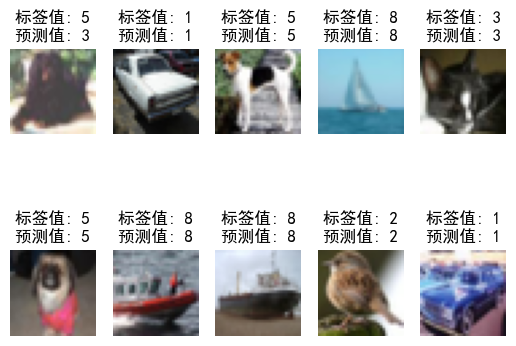

In [8]:
plt.figure()
for i in range(10):
    num=np.random.randint(1,10000)
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.imshow(x_test[num],cmap="gray")
    demo=tf.reshape(x_test[num],(1,32,32,3))
    y_pred=np.argmax(model.predict(demo))
    plt.title("标签值: "+str((y_test.numpy())[num,0])+"\n预测值: "+str(y_pred))
plt.show